```{margin}
<center><img src=https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Leonhard_Euler_-_edit1.jpg/800px-Leonhard_Euler_-_edit1.jpg width=100>

Leonhard Euler (1707-1783), éminent scientifique suisse
</center>
```
# Résolution d'équation différentielle par la méthode d'Euler

> La méthode d'Euler permet d'approximer une solution d'une équation différentielle.  
> Dans le programme, nous nous restreignons à une équation différentielle d'ordre $1$, c'est-à-dire où seules apparaissent des dérivées premières.

## Équation différentielle d'ordre 1

### Cadre général

Considérons une équation différentielle d'ordre 1 :

$$y'(t) = f(t, y(t))$$
$$
    y(t_0) = y_0
$$
- $y$ est la **fonction inconnue** : on cherche à détermine la valeur de $y(t)$ pour $t \in I$, où $I \subseteq \mathbb{R}$ est l'intervalle de définition de $y$.
- $f$ est l'expression qui apparaît dans le **second membre** de l'équation différentielle, qui peut utiliser $t$ et $y(t)$ (d'où une fonction de $2$ variables).  
- $y(t_0) = y_0$ est la condition initiale, garantissant l'unicité de la solution (théorème de Cauchy).

On cherche donc une fonction $y$ définie sur un intervalle $I$ telle que : 

$$
    \forall t \in I, \quad y'(t) = f(t, y(t))
$$

### Exemples d'équations différentielles 

Voici des exemples d'équations différentielles classiques avec la valeur correspondante de $f(t, y)$ :
| Équation différentielle | Second membre $f(t, y)$ | Solution |
|:-----------------------:|:-----------------------:|:----------------------:|
| $y'(t) = t$ <br> $y(0) = 0$  | $f(t, y) = t$ | $y(t) = \frac{t^2}{2}$ |
| $y'(t) = y(t)$ <br> $y(0) = 1$ | $f(t, y) = y$ | $y(t) = e^t$ |
| $y'(t) = \ln(t)$ <br> $y(1) = 0$ | $f(t, y) = \ln(t)$ | $y(t) = t\ln(t) - t$ |

````{admonition} Exercice
 Quelle fonction $f$ utiliser avec l'équation différentielle $y'(t) = t^3 - y(t)^3$ ? Définir cette fonction en Python.
````

## Méthode d'Euler

### Théorie

````{margin}
```{admonition} Rappel
$$
    y'(t) = f(t, y(t))
$$
$$
    y(t_0) = y_0
$$
```
````

La méthode d'Euler calcule des approximations de $y$ de proche en proche. La valeur de $y(t_0) = y_0$ est connue (condition intiale).  
Soit $h$ un petit réel (par exemple $0.01$) le **pas d'approximation** de la méthode d'Euler.  

Alors, par développement limité d'ordre $1$ :

$$
    y(t_0 + h) \approx y(t_0) + h y'(t_0) = y_0 + h y'(t_0)
$$

Comme $y$ vérifie l'équation différentielle $y'(t_0) = f(t_0, y(t_0))$ :

$$
    y(t_0 + h) \approx y_0 + hf(t_0, y(t_0))
$$
Ainsi, on peut approximer $y(t_0 + h)$ par $y_1 = y_0 + hf(t_0, y(t_0))$.  

De même, on peut approximer $y(t_0 + 2h)$ par $y_1 + hf(t_0 + h, y_1)$, et ainsi de suite... Ce qui permet de définir des approximations $y_k \approx y(t_0 + kh)$ par la formule de récurrence suivante :

$$
    \boxed{y_{k + 1} = y_k + h f(t_0 + k h, y_k)}
$$

**Remarque** : Cette dernière formule n'est autre que l'expression bien connue en physique $y(t + \Delta t) \approx y(t) + \Delta t y'(t)$, où on a remplacé $y'(t)$ par le second membre de l'équation différentielle.

### Illustration

On obtient chaque point d’approximation en se déplaçant de $\Delta t$ le long de la tangente à $y$ :

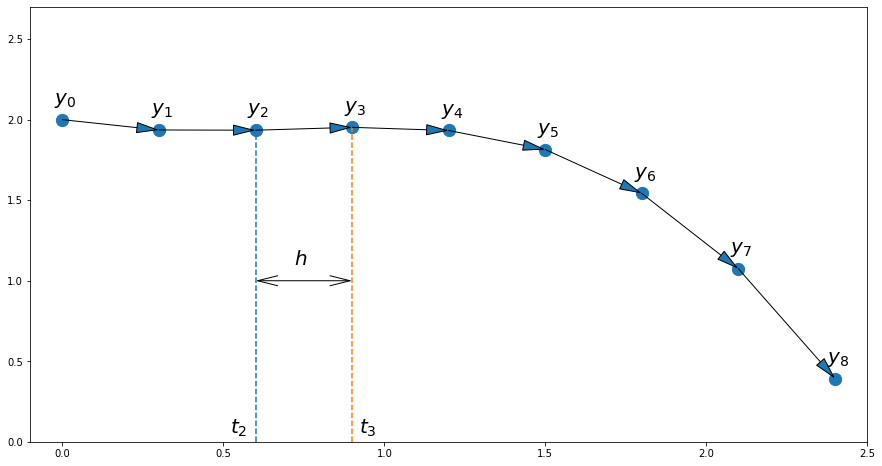

In [180]:
import matplotlib.pyplot as plt
import numpy as np

def f(t, y):
    return np.cos(t)*t - 0.5

def arrow(p1, p2, double=False):
    a = "<->" if double else "-|>"
    plt.annotate("", 
        xytext=p1, 
        xy=p2, 
        arrowprops=dict(arrowstyle=f"{a},head_width=.5,head_length=2", 
            shrinkA=0,shrinkB=0))

t = [0]
y = [2]
h = 0.3
plt.figure(figsize=(15, 8))
plt.axis([-0.1, 2.5, 0, 2.7])
for _ in range(10):
    t.append(t[-1] + h)
    y.append(y[-1] + h*f(t[-1], y[-1]))
    arrow((t[-2], y[-2]), (t[-1], y[-1]))

plt.scatter(t, y, s=150)
for i in range(len(t) - 1):
    plt.annotate(f"$y_{i}$", (t[i] - 0.025, y[i] + 0.1), fontsize=20)

plt.plot((t[2], t[2]), (0, y[2]), '--')
plt.plot((t[3], t[3]), (0, y[3]), '--')
plt.annotate("$t_2$", (t[2]-.08, 0.05), fontsize=20)
plt.annotate("$t_3$", (t[3]+.02, 0.05), fontsize=20)
plt.annotate(f"$y_{i}$", (t[i] - 0.025, y[i] + 0.1), fontsize=20)

arrow((t[2], 1), (t[3], 1), True)
plt.annotate("$h$", (t[2] + .4*h, 1.1), fontsize=20)

plt.show()

### Programmation

Pour trouver des approximations de $y$, il faut utiliser itérativement l'équation de récurrence $y_{k + 1} = y_k + h f(t_0 + k h, y_k)$.  
Les approximations $y_k$ seront stockées dans une liste $y$ et les temps $t_k$ dans une liste $t$.
Nous utilisons une boucle `for` pour calculer $n$ approximations de l'équation :

$$
    y'(t) = y(t)
$$
$$
    y(0) = 1
$$

In [170]:
def euler(f, t0, y0, h, n):
    y = [y0]
    t = [t0]
    for k in range(n):
        t.append(t[-1] + h)
        y.append(y[-1] + h*f(t[-1], y[-1]))
    return t, y

In [171]:
def f(t, y):
    return y

t, y = euler(f, 0, 1, 0.1, 10)

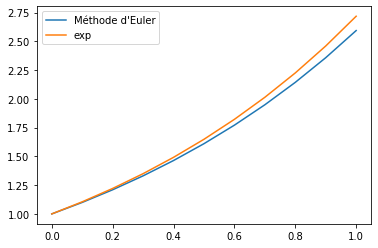

In [172]:
plt.plot(t, y, label="Méthode d'Euler")
plt.plot(t, np.exp(t), label="exp")
plt.legend()
plt.show()

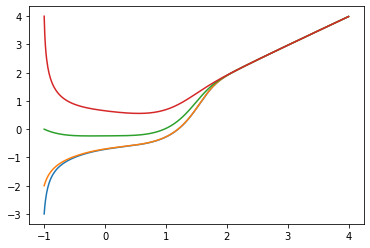

In [173]:
def f(t, y):
    return t**3 - y**3

for y0 in [-3, -2, 0, 4]:
    t, y = euler(f, -1, y0, 0.01, 500)
    plt.plot(t, y) 

plt.show()